# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



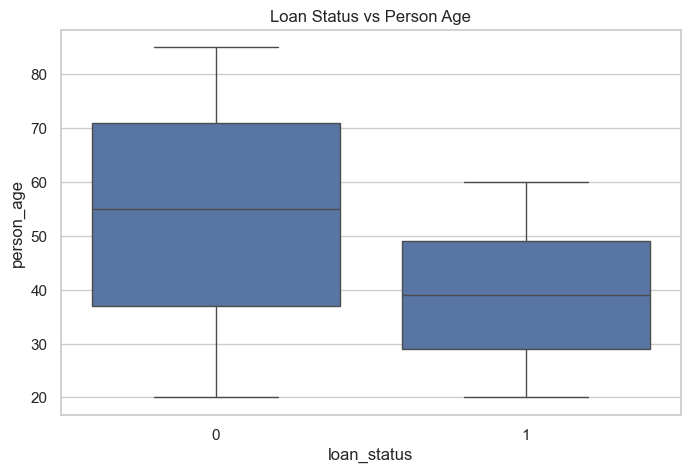

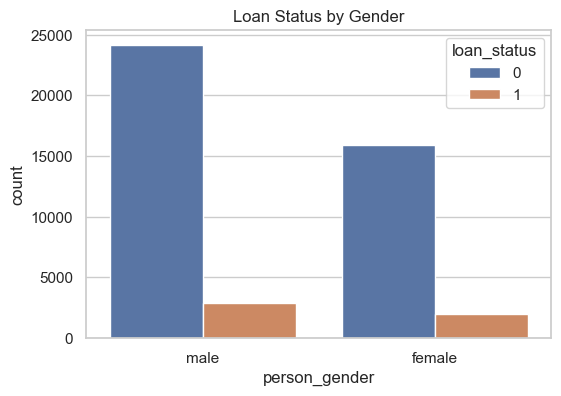

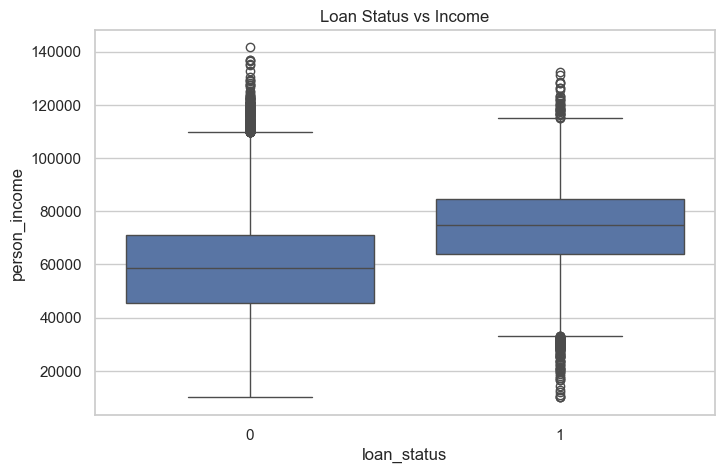

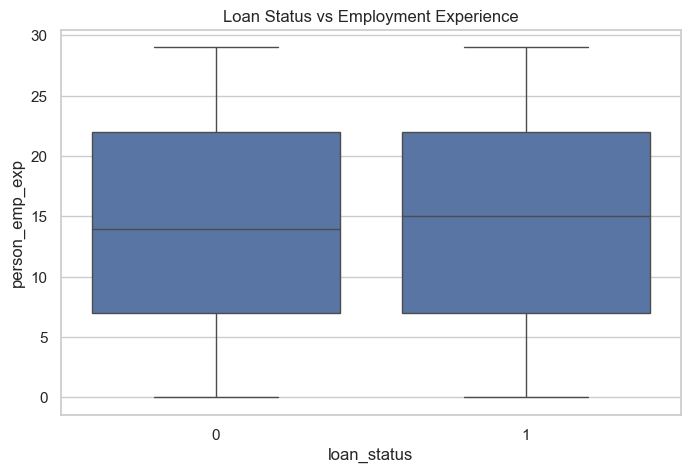

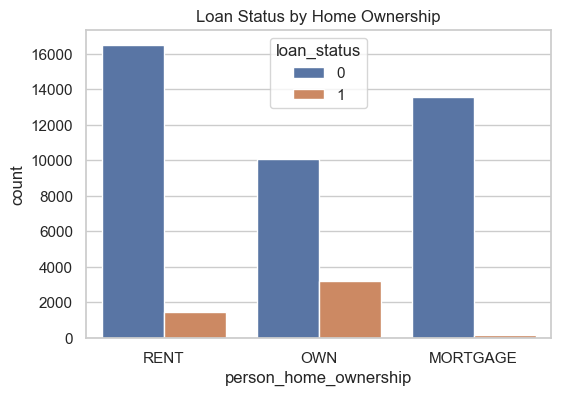

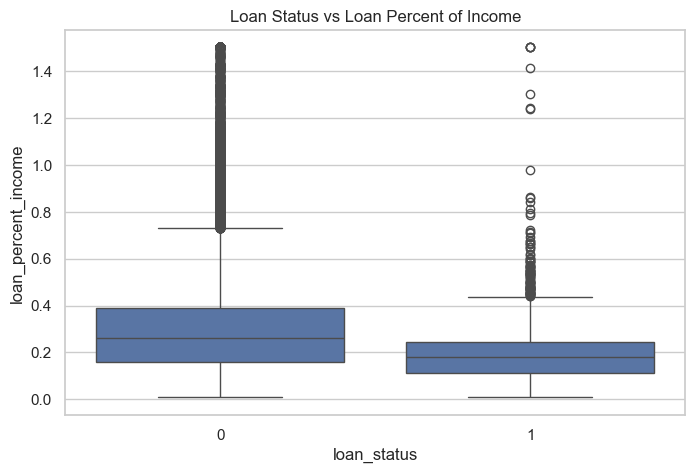

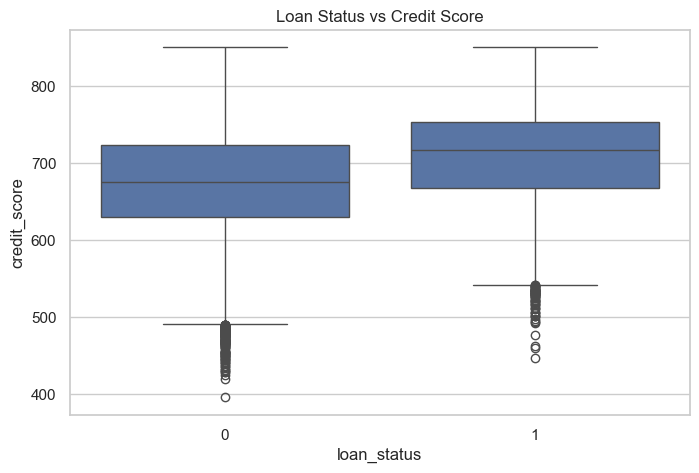

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("loan_data.csv")

# Set visual style
sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title("Loan Status vs Person Age")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='person_gender', hue='loan_status', data=df)
plt.title("Loan Status by Gender")
plt.show()



plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Loan Status vs Income")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='person_emp_exp', data=df)
plt.title("Loan Status vs Employment Experience")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title("Loan Status by Home Ownership")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title("Loan Status vs Loan Percent of Income")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title("Loan Status vs Credit Score")
plt.show()


It seems the factors that seem to impact it the most are
Home Ownership
Income
Age
